In [186]:
from sympy import *
from sympy.plotting import plot3d
from IPython.display import display, Math

# 1)

<img src="../images/WS4-1.png" alt="1" width="600"/>

<img src="../images/WS4-1a.png" alt="1a" width="700"/>

In [187]:
R_A = Matrix([0, 0, 0]) 
R_B = Matrix([3, 0, 0]) 
R_C = Matrix([1, 0, 3]) 
R_D = Matrix([2, 3, 0]) 

G_1 = R_B - R_A
G_2 = R_D - R_A 
G_3 = R_C - R_A 

display(Math(r'\boldsymbol{G}_1='+latex(G_1)))
display(Math(r'\boldsymbol{G}_2='+latex(G_2)))
display(Math(r'\boldsymbol{G}_3='+latex(G_3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [188]:
theta_1, theta_2, theta_3 = symbols('theta^1 theta^2 theta^3')
eta_A = 1 - theta_1 - theta_2 - theta_3
eta_B = theta_1
eta_C = theta_3
eta_D = theta_2

R = eta_A * R_A + eta_B * R_B + eta_C * R_C + eta_D * R_D

display(Math(r'\boldsymbol{R}(\theta^1, \theta^2, \theta^3)='+latex(R)))

<IPython.core.display.Math object>

<img src="../images/WS4-1b.png" alt="1b" width="700"/>

In [189]:
u_1B, u_2B, u_3B, u_1D, u_2D, u_3D = symbols('u^1_B u^2_B u^3_B u^1_D u^2_D, u^3_D')
u_A = Matrix([0, 0, 0])
u_B = Matrix([u_1B, u_2B, u_3B])
u_C = Matrix([0, 0, 0])
u_D = Matrix([u_1D, u_2D, u_3D])

r = eta_A * (R_A + u_A) + eta_B * (R_B + u_B) + eta_C * (R_C + u_C) + eta_D * (R_D + u_D)

display(Math(r'\boldsymbol{r}(\theta^1, \theta^2, \theta^3)='+latex(r)))

<IPython.core.display.Math object>

<img src="../images/WS4-1c.png" alt="1c" width="700"/>

In [190]:
J = Matrix([G_1.T,
            G_2.T,
            G_3.T])

G_ij = simplify(J*J.T)

display(Math(r'\left[ G_{ij} \right]='+latex(G_ij)))

<IPython.core.display.Math object>

In [191]:
g_1 = diff(r, theta_1)
g_2 = diff(r, theta_2)
g_3 = diff(r, theta_3)

display(Math(r'\boldsymbol{g}_1='+latex(g_1)))
display(Math(r'\boldsymbol{g}_2='+latex(g_2)))
display(Math(r'\boldsymbol{g}_3='+latex(g_3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [192]:
j = Matrix([g_1.T,
            g_2.T,
            g_3.T])

g_ij = expand(simplify(j*j.T))

display(Math(r'\left[ g_{ij} \right]='+latex(g_ij)))

<IPython.core.display.Math object>

In [193]:
epsilon_ij = simplify(1/2 * (g_ij - G_ij))

display(Math(r'\left[ \varepsilon_{ij} \right]='+latex(epsilon_ij)))

<IPython.core.display.Math object>

In [194]:
g_ij_list = [ [g_ij[i,j] for i in range(3)] for j in range(3)]


# linearize deformed metric tensor coefficients
for i in range(3):
    for j in range(i+1):
        for k in range(3):
            g_ij_list[i][j] = (g_ij_list[i][j] + O(u_B[k]**2)).removeO()
            g_ij_list[i][j] = (g_ij_list[i][j] + O(u_D[k]**2)).removeO()
        for k in range(3):
            coeffs_ukB = Poly(g_ij_list[i][j], u_B[k]).coeffs()
            if len(coeffs_ukB) != 1:
                coeffs_ukB_ukD = Poly(coeffs_ukB[0], u_D[k]).coeffs()
                if not coeffs_ukB[0] == coeffs_ukB_ukD[0]:
                    g_ij_list[i][j] = g_ij_list[i][j] - coeffs_ukB_ukD[0] * u_B[k] * u_D[k]
        if i != j:
            g_ij_list[j][i] = g_ij_list[i][j]

g_ij_lin = Matrix(g_ij_list)
epsilon_ij_lin = 1/2 * (g_ij_lin - G_ij)

display(Math(r'\left[ \varepsilon^{lin}_{ij} \right]='+latex(epsilon_ij_lin)))


<IPython.core.display.Math object>

<img src="../images/WS4-1d.png" alt="1d" width="700"/>

In [195]:
g_ij_specific = g_ij.subs([(u_1B, 0), (u_2B, 0), (u_3B, 0.5), (u_1D, 0), (u_2D, 0), (u_3D, 1)])
g_ij_lin_specific = g_ij_lin.subs([(u_1B, 0), (u_2B, 0), (u_3B, 0.5), (u_1D, 0), (u_2D, 0), (u_3D, 1)])

G = det(G_ij)
g = det(g_ij_specific)
g_lin = det(g_ij_lin_specific)

delta_V = sqrt(g) - sqrt(G)
delta_V_lin = sqrt(g_lin) - sqrt(G)

display(Math(r'\left[ G_{ij} \right] \left( \boldsymbol{u}_B, \boldsymbol{u}_D \right)='+latex(G_ij)))
display(Math(r'\left[ g_{ij} \right] \left( \boldsymbol{u}_B, \boldsymbol{u}_D \right)='+latex(g_ij_specific)))
display(Math(r'\left[ g^{lin}_{ij} \right] \left( \boldsymbol{u}_B, \boldsymbol{u}_D \right)='+latex(g_ij_lin_specific)))

display(Math(r'G ='+latex(G)))
display(Math(r'g='+latex(g)))
display(Math(r'g^{lin}='+latex(g_lin)))

display(Math(r'\Delta V='+latex(delta_V)))
display(Math(r'\Delta V^{lin}='+latex(delta_V_lin)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 2)

<img src="../images/WS4-2.png" alt="2" width="700"/>

<img src="../images/WS4-2a.png" alt="2a" width="700"/>

In [196]:
u_c0 = symbols('u_c0')

R_A = Matrix([0, 0]) 
R_B = Matrix([1, 2]) 
R_C = Matrix([3, 0]) 

u_A = Matrix([0, 0]) 
u_B = Matrix([0, 0]) 
u_C = Matrix([u_c0, 0]) 



In [197]:
theta_1, theta_2 = symbols('theta^1 theta^2')

eta_geo_1 = theta_1
eta_geo_2 = theta_2

R = R_A + eta_geo_1 * (R_C - R_A) + eta_geo_2 * (R_B - R_A)

display(Math(r'\boldsymbol{R} \left( \theta^1, \theta^2 \right)='+latex(R)+r'\qquad \theta^1 \in \left[0; 1 \right] \land \theta^2 \in \left[0; 1-\theta^1 \right] '))

<IPython.core.display.Math object>

<img src="../images/WS4-2b.png" alt="2b" width="700"/>

In [198]:
eta_dis_1 = theta_1**2
eta_dis_2 = theta_2

u = u_A + eta_dis_1 * (u_C - u_A) + eta_dis_2 * (u_B - u_A)

r = R + u

display(Math(r'\boldsymbol{r}(\theta^1, \theta^2)='+latex(r)))

<IPython.core.display.Math object>

<img src="../images/WS4-2c.png" alt="2c" width="700"/>

In [199]:
G_1 = diff(R, theta_1)
G_2 = diff(R, theta_2)

g_1 = diff(r, theta_1)
g_2 = diff(r, theta_2)

J = Matrix([G_1.T,
            G_2.T])

j = Matrix([g_1.T,
            g_2.T])

G_ij = J*J.T
g_ij = expand(simplify(j*j.T))


epsilon_ij = 1/2 * (g_ij - G_ij)

display(Math(r'\boldsymbol{G}_1='+latex(G_1)))
display(Math(r'\boldsymbol{G}_2='+latex(G_2)))
display(Math(r'\boldsymbol{g}_1(\theta^1, \theta^2)='+latex(g_1)))
display(Math(r'\boldsymbol{g}_2(\theta^1, \theta^2)='+latex(g_2)))

display(Math(r'\left[ G_{ij} \right]='+latex(G_ij)))
display(Math(r'\left[ g_{ij} \right]='+latex(g_ij)))

display(Math(r'\left[ \varepsilon_{ij} \right]='+latex(epsilon_ij)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<img src="../images/WS4-2d.png" alt="2d" width="700"/>

In [ ]:
E  = symbols('E')
nu = 0.25

lam = (E * nu) / ((1 + nu)*(1 - 2*nu))
mu = E / (2*(1+nu))

In [216]:
G_ij_con = G_ij**-1

display(Math(r'\left[ G^{ij} \right] = \frac{1}{36}'+latex(G_ij_con *36)))

<IPython.core.display.Math object>

In [201]:
C_ijkl = [[[ [0 for i in range(2)] for j in range(2)] for k in range(2)] for l in range(2)]

for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                C_ijkl[i][j][k][l] = lam * G_ij_con[i,j] * G_ij_con[k,l] + mu * (G_ij_con[i,k]*G_ij_con[j,l] + G_ij_con[i,l]*G_ij_con[j,k])

C_matrix = Matrix([[C_ijkl[0][0][0][0], C_ijkl[0][0][0][1], C_ijkl[0][0][1][0], C_ijkl[0][0][1][1]],
                   [C_ijkl[0][1][0][0], C_ijkl[0][1][0][1], C_ijkl[0][1][1][0], C_ijkl[0][1][1][1]],
                   [C_ijkl[1][0][0][0], C_ijkl[1][0][0][1], C_ijkl[1][0][1][0], C_ijkl[1][0][1][1]],
                   [C_ijkl[1][1][0][0], C_ijkl[1][1][0][1], C_ijkl[1][1][1][0], C_ijkl[1][1][1][1]]])


display(Math(r'\left[ C \right] ='+latex(C_matrix)))

<IPython.core.display.Math object>

In [202]:
epsilon_vector = Matrix([epsilon_ij[0,0], epsilon_ij[0,1], epsilon_ij[1,0], epsilon_ij[1,1]])

sigma_vector = expand(simplify(C_matrix * epsilon_vector))

sigma_ij = Matrix([[sigma_vector[0], sigma_vector[1]],
                   [sigma_vector[2], sigma_vector[3]]])

display(Math(r'\left[ \varepsilon \right] ='+latex(epsilon_vector)))
display(Math(r'\left[ \sigma \right] ='+latex(sigma_vector)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<img src="../images/2d.png" alt="drawing" width="600"/>

In [203]:
n_cart = Matrix([0, 1])
p_cart = Matrix([1, 0])

J = Matrix([[G_1.T],
            [G_2.T]])

n_cov = J * n_cart
p_cov = J * p_cart

sigma = (n_cov.T * sigma_ij.subs([(theta_2, 0.5)]) * n_cov)[0]
tau = (p_cov.T * sigma_ij.subs([(theta_2, 0.5)]) * n_cov)[0]

display(Math(r'\sigma ='+latex(sigma)))
display(Math(r'\tau ='+latex(tau)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

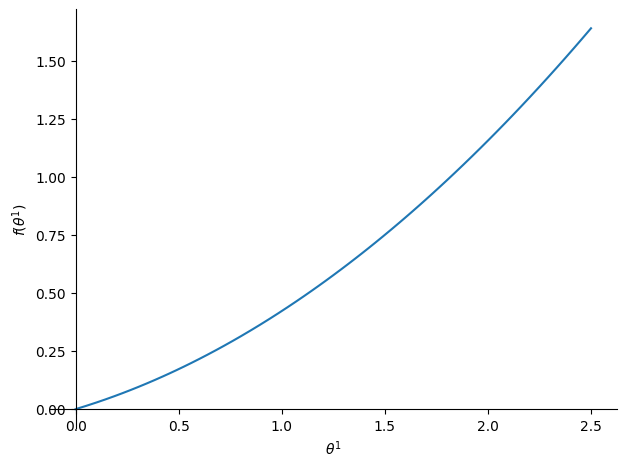

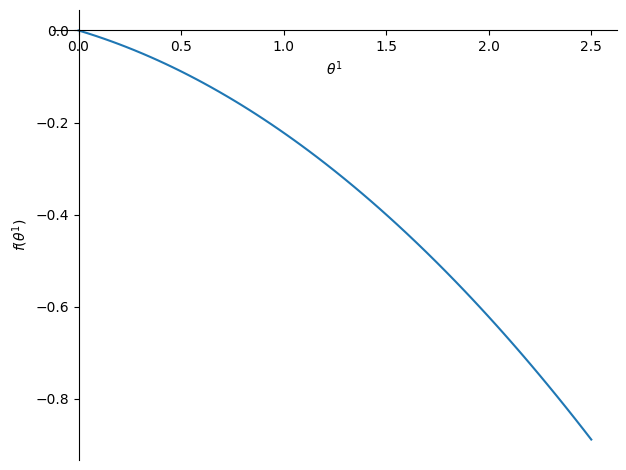

In [204]:

sigma_subs= sigma.subs([(u_c0, 1), (E, 1)])
tau_subs= tau.subs([(u_c0, 1), (E, 1)])

plot(sigma_subs, (theta_1, 0 ,2.5))
plot(tau_subs, (theta_1, 0 ,2.5))

# 3)

<img src="../images/WS4-3.png" alt="3" width="700"/>

<img src="../images/WS4-3a.png" alt="3a" width="700"/>

In [205]:
theta_1, theta_2 = symbols('theta^1, theta^2')

X_1 = theta_1 * cos(theta_2)
X_2 = theta_1 * sin(theta_2)

R = Matrix([[X_1],
            [X_2]])

G_1 = diff(R, theta_1)
G_2 = diff(R, theta_2)

J = Matrix([G_1.T,
            G_2.T])

G_ij = simplify(J*J.T)

G_ij_con = G_ij**-1

display(Math(r'\boldsymbol{R}(\theta^1, \theta^2)='+latex(R)))
display(Math(r'\boldsymbol{G}_1='+latex(G_1)))
display(Math(r'\boldsymbol{G}_2='+latex(G_2)))
display(Math(r'\left[ G_{ij} \right]='+latex(G_ij)))
display(Math(r'\left[ G^{ij} \right]='+latex(G_ij_con)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<img src="../images/WS4-3b.png" alt="3b" width="700"/>

In [206]:
x_1 = 2 * theta_1 * cos(theta_2)
x_2 = 2 * theta_1 * sin(theta_2)

r = Matrix([[x_1],
            [x_2]])

u_cart = r - R

u_con = simplify(J * u_cart)

display(Math(r'\boldsymbol{r}(\theta^1, \theta^2)='+latex(r)))
display(Math(r'\left[ u^{i°} \right](\theta^1, \theta^2)='+latex(u_cart)))
display(Math(r'\left[ u^{i} \right](\theta^1, \theta^2)='+latex(u_con)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<img src="../images/WS4-3c.png" alt="3c" width="700"/>

In [207]:
G_i = [G_1, G_2] # 1D-array containing the basis vectors
th = [theta_1, theta_2] # 1D-array containing the coordinates \theta^1 to \theta^3
Gi_j = [ [0 for i in range(2)] for j in range(2)] # emty 2D-array

for i in range(2):
    for j in range(i+1):
        Gi_j[i][j] = diff(G_i[i], th[j])
        if i != j:
            Gi_j[j][i] = Gi_j[i][j]

display(Math(r'\boldsymbol{G}_{1,1}='+latex(Gi_j[0][0])+r', \ \boldsymbol{G}_{1,2}='+latex(Gi_j[0][1])))
display(Math(r'\boldsymbol{G}_{2,1}='+latex(Gi_j[1][0])+r', \ \boldsymbol{G}_{2,2}='+latex(Gi_j[1][1])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [208]:
GammaSecond = [[ [0 for i in range(2)] for j in range(2)] for k in range(2)] # empty 3D-Array
G_1_con = G_ij_con[0,0] * G_1 + G_ij_con[0,1] * G_2
G_2_con = G_ij_con[1,0] * G_1 + G_ij_con[1,1] * G_2

# display(Math(r'\boldsymbol{G}^1='+latex(G_1_con)))
# display(Math(r'\boldsymbol{G}^2='+latex(G_2_con)))

G_i_con = [G_1_con, G_2_con] # 1D-array containing the basis vectors

for i in range(2):
    for j in range(i+1):
        for k in range(2):
            GammaSecond[i][j][k] = (simplify((Gi_j[i][j]).T * G_i_con[k]))[0]
        if i != j:
            GammaSecond[j][i][k] = GammaSecond[i][j][k]

for i in range(2):
    display(Math(r'\Gamma_{ij}^{\ \ \ \ '+f'{i+1}'+r'}='+latex(Array(GammaSecond)[:,:,i])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<img src="../images/WS4-3d.png" alt="3d" width="700"/>

In [209]:
ui_j_cov = [ [0 for i in range(2)] for j in range(2)]
th = [theta_1, theta_2]

for i in range(2):
    for j in range(2):
        ui_j_cov[i][j] = diff(u_con[i], th[j])
        for k in range(2):
            ui_j_cov[i][j] = ui_j_cov[i][j] + u_con[k] * GammaSecond[k][j][i]

for j in range(2):
    for i in range(2):
        display(Math(r'\left. u^{'+f'{i+1}'+r'} \right|_{'+f'{j+1}'+r'}='+latex(ui_j_cov[i][j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [210]:
ui_j_con = [ [0 for i in range(2)] for j in range(2)]

for i in range(2):
    for j in range(2):
        for k in range(2):
            ui_j_con[i][j] = ui_j_con[i][j] + G_ij[i,k] *ui_j_cov[k][j]

for j in range(2):
    for i in range(2):
        display(Math(r'\left. u_{'+f'{i+1}'+r'} \right|_{'+f'{j+1}'+r'}='+latex(ui_j_con[i][j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [211]:
epsilon_ij = [ [0 for i in range(2)] for j in range(2)]

for i in range(2):
    for j in range(2):
        epsilon_ij[i][j]= ui_j_con[i][j] + ui_j_con[j][i]
        for k in range(2):
            epsilon_ij[i][j]= epsilon_ij[i][j] + ui_j_con[k][i] * ui_j_cov[k][j]

epsilon_ij = 1/2 * Array(epsilon_ij)

display(Math(r'\left[ \varepsilon_{ij} \right]='+latex(epsilon_ij)))

<IPython.core.display.Math object>

<img src="../images/WS4-3e.png" alt="3e" width="700"/>

In [212]:
E  = symbols('E')
nu = 0

lam = (E * nu) / ((1 + nu)*(1 - 2*nu))
mu = E / (2*(1+nu))

display(Math(r'\lambda = '+latex(lam)))
display(Math(r'\mu = '+latex(mu)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [213]:
C_ijkl = [[[ [0 for i in range(2)] for j in range(2)] for k in range(2)] for l in range(2)]

for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                C_ijkl[i][j][k][l] = lam * G_ij_con[i,j] * G_ij_con[k,l] + mu * (G_ij_con[i,k]*G_ij_con[j,l] + G_ij_con[i,l]*G_ij_con[j,k])

C_matrix = Matrix([[C_ijkl[0][0][0][0], C_ijkl[0][0][0][1], C_ijkl[0][0][1][0], C_ijkl[0][0][1][1]],
                   [C_ijkl[0][1][0][0], C_ijkl[0][1][0][1], C_ijkl[0][1][1][0], C_ijkl[0][1][1][1]],
                   [C_ijkl[1][0][0][0], C_ijkl[1][0][0][1], C_ijkl[1][0][1][0], C_ijkl[1][0][1][1]],
                   [C_ijkl[1][1][0][0], C_ijkl[1][1][0][1], C_ijkl[1][1][1][0], C_ijkl[1][1][1][1]]])


display(Math(r'\left[ C \right] ='+latex(C_matrix)))

<IPython.core.display.Math object>

In [214]:
epsilon_vector = Matrix([epsilon_ij[0,0], epsilon_ij[0,1], epsilon_ij[1,0], epsilon_ij[1,1]])

sigma_vector = expand(simplify(C_matrix * epsilon_vector))

sigma_ij = Matrix([[sigma_vector[0], sigma_vector[1]],
                   [sigma_vector[2], sigma_vector[3]]])

display(Math(r'\left[ \sigma^{ij} \right] =\frac{3}{2} E'+latex(sigma_ij * 2/(3*E))))

<IPython.core.display.Math object>

<img src="../images/WS4-3f.png" alt="3f" width="700"/>

In [215]:
sigma_ij_phy = [[[ [sigma_ij[i, j] for i in range(2)] for j in range(2)] for k in range(2)] for l in range(2)]

for i in range(2):
    for j in range(2):
        sigma_ij_phy[i][j] = sigma_ij[i,j] * sqrt(G_ij[i,i]) * sqrt(G_ij[j,j]) 

sigma_ij_phy = simplify(Array(sigma_ij_phy))

display(Math(r'\left[\tilde{\sigma}^{ij}\right]='+latex(sigma_ij_phy)))

<IPython.core.display.Math object>

<img src="../images/3f.png" alt="2f" width="600"/>